In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from fsmodels import SklSingleExpFrequencyScan

from fsplots import plot_experimental_points
from fsplots import plot_model
from fsplots import plot_loss_path
from fsplots import plot_deviations

# sklearn-compatible class

In [2]:
X = np.linspace(0, 3.5, 1000)

In [3]:
fs = SklSingleExpFrequencyScan(filling_pulse=20*10**-6)

fs.exps_params_ = [[-2.3, 3.5]]
fs.p_coef_ = 0.2

y = fs.predict(X) 
y += np.random.normal(loc=0, scale=0.2, size=y.shape[0])

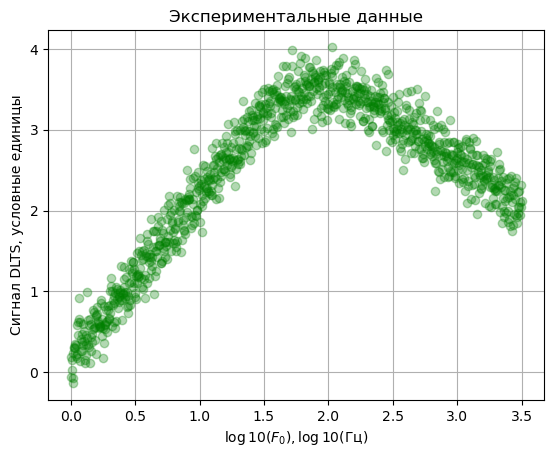

In [4]:
plot_experimental_points(X, y)
plt.show()

In [5]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-6,
                               fit_p_coef = True,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X, y)

SklSingleExpFrequencyScan(filling_pulse=2e-06, learning_rate=0.05, n_iters=200,
                          stop_val=1e-05)

In [6]:
fs.fit_results_

,amplitude_0,filling_pulse,fit_p_coef,learning_rate,loss,n_exps,n_iters,p_coef,stop_val,time_constant_pow_0,verbose
0,-0.537614,0.000002,True,0.05,8.210142,1,200,1.000000,0.00001,-2.046356,False
1,-0.406976,0.000002,True,0.05,7.858197,1,200,1.030745,0.00001,-2.037664,False
2,-0.281619,0.000002,True,0.05,7.540653,1,200,1.052815,0.00001,-2.030753,False
3,-0.160750,0.000002,True,0.05,7.249437,1,200,1.067463,0.00001,-2.025797,False
4,-0.043745,0.000002,True,0.05,6.978626,1,200,1.075559,0.00001,-2.022898,False
...,...,...,...,...,...,...,...,...,...,...,...
145,3.479800,0.000002,True,0.05,0.040482,1,200,0.198558,0.00001,-2.297530,False
146,3.480542,0.000002,True,0.05,0.040470,1,200,0.198674,0.00001,-2.297407,False
147,3.481263,0.000002,True,0.05,0.040460,1,200,0.198788,0.00001,-2.297288,False
148,3.481961,0.000002,True,0.05,0.040450,1,200,0.198898,0.00001,-2.297174,False


In [7]:
fs.exps_params_

array([[-2.29706261,  3.48263872]])

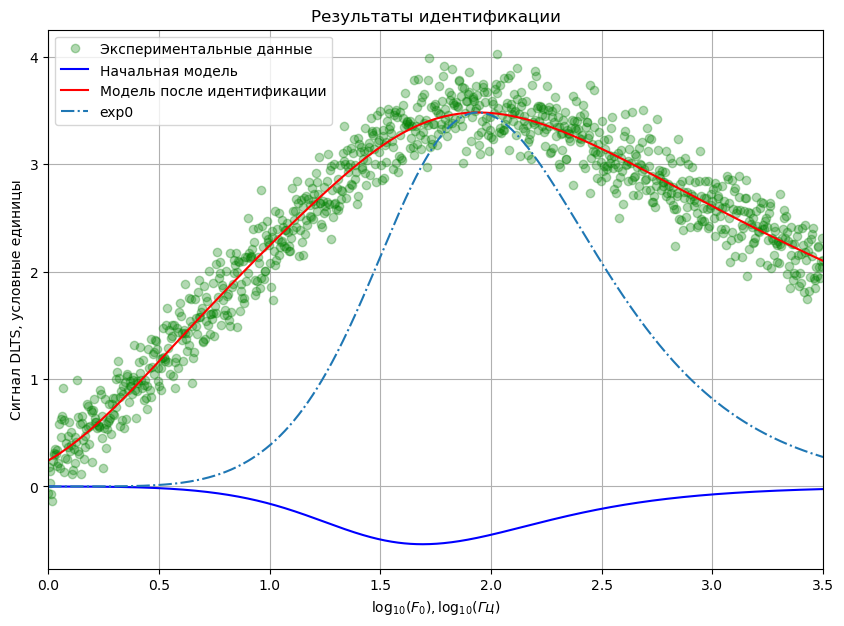

In [8]:
fig, ax = plot_model(X, y, SklSingleExpFrequencyScan, fs.fit_results_)

plt.show()

In [9]:
fs.get_params()

{'filling_pulse': 2e-06,
 'fit_p_coef': True,
 'learning_rate': 0.05,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [10]:
fs.set_params(fit_p_coef=False)

SklSingleExpFrequencyScan(filling_pulse=2e-06, fit_p_coef=False,
                          learning_rate=0.05, n_iters=200, stop_val=1e-05)

In [11]:
fs.get_params()

{'filling_pulse': 2e-06,
 'fit_p_coef': False,
 'learning_rate': 0.05,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [12]:
fs.score(X, y)

0.9556016447281276

In [13]:
fs.predict(X)

array([0.24051895, 0.24475267, 0.2490292 , 0.25334847, 0.25771037,
       0.26211479, 0.26656163, 0.27105077, 0.27558208, 0.28015544,
       0.28477071, 0.28942774, 0.29412639, 0.2988665 , 0.30364791,
       0.30847046, 0.31333397, 0.31823826, 0.32318315, 0.32816846,
       0.33319398, 0.33825952, 0.34336487, 0.34850982, 0.35369415,
       0.35891766, 0.3641801 , 0.36948125, 0.37482089, 0.38019876,
       0.38561462, 0.39106823, 0.39655934, 0.40208769, 0.40765302,
       0.41325506, 0.41889356, 0.42456823, 0.4302788 , 0.436025  ,
       0.44180654, 0.44762314, 0.45347451, 0.45936036, 0.46528039,
       0.47123431, 0.47722182, 0.48324262, 0.4892964 , 0.49538285,
       0.50150166, 0.50765253, 0.51383514, 0.52004916, 0.5262943 ,
       0.53257021, 0.53887659, 0.54521311, 0.55157944, 0.55797526,
       0.56440024, 0.57085405, 0.57733637, 0.58384685, 0.59038518,
       0.596951  , 0.603544  , 0.61016384, 0.61681018, 0.62348268,
       0.63018101, 0.63690483, 0.64365381, 0.65042761, 0.65722

# K-fold Cross-Validation and hyperparameter tuning

## Подготовка данных

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

indexes = np.argsort(X_train)
X_train = X_train[indexes]
y_train = y_train[indexes]

indexes = np.argsort(X_test)
X_test = X_test[indexes]
y_test = y_test[indexes]

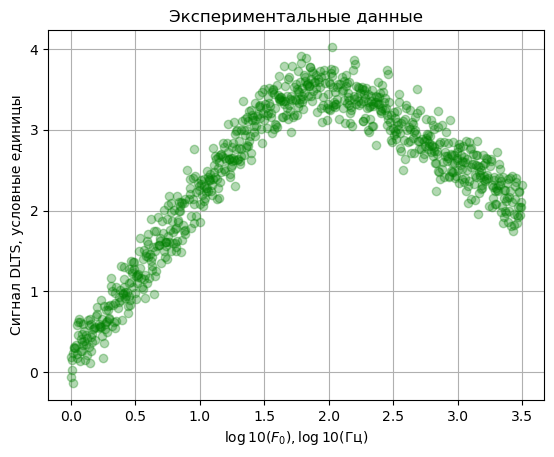

In [15]:
plot_experimental_points(X_train, y_train)
plt.show()

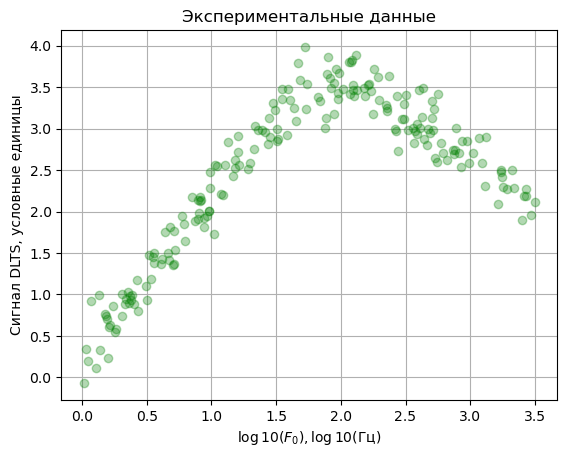

In [16]:
plot_experimental_points(X_test, y_test)
plt.show()

## fit_p_coef=False

In [17]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-5,
                               fit_p_coef=False,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=X_train, y=y_train)

SklSingleExpFrequencyScan(filling_pulse=2e-05, fit_p_coef=False,
                          learning_rate=0.05, n_iters=200, stop_val=1e-05)

In [18]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.56102549 1.22526469 1.71983858 1.87587301 0.95303331 1.44542272
 0.4522598  1.51033724 1.85362324 1.86699991]
Mean: 1.346367798120722
Standard deviation: 0.5069999577185875


In [19]:
fs.fit_results_

,amplitude_0,filling_pulse,fit_p_coef,learning_rate,loss,n_exps,n_iters,p_coef,stop_val,time_constant_pow_0,verbose
0,0.313215,0.00002,False,0.05,6.264114,1,200,1.0,0.00001,-2.981225,False
1,0.402325,0.00002,False,0.05,6.101938,1,200,1.0,0.00001,-2.966499,False
2,0.489948,0.00002,False,0.05,5.942237,1,200,1.0,0.00001,-2.947876,False
3,0.576275,0.00002,False,0.05,5.783971,1,200,1.0,0.00001,-2.925626,False
4,0.661470,0.00002,False,0.05,5.626350,1,200,1.0,0.00001,-2.900044,False
...,...,...,...,...,...,...,...,...,...,...,...
195,4.587018,0.00002,False,0.05,1.448425,1,200,1.0,0.00001,-2.249973,False
196,4.587796,0.00002,False,0.05,1.448413,1,200,1.0,0.00001,-2.249984,False
197,4.588554,0.00002,False,0.05,1.448401,1,200,1.0,0.00001,-2.249995,False
198,4.589293,0.00002,False,0.05,1.448391,1,200,1.0,0.00001,-2.250006,False


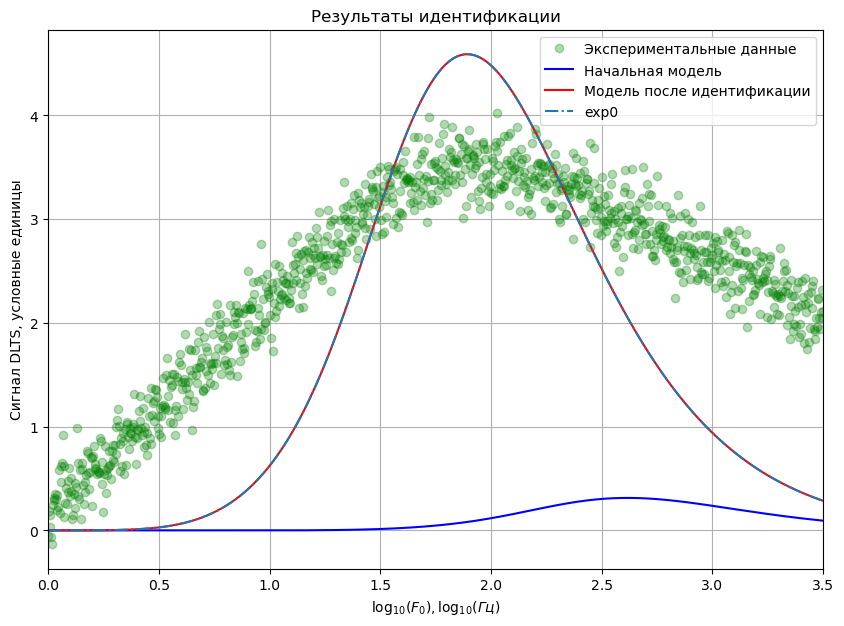

In [20]:
plot_model(X, y, SklSingleExpFrequencyScan, fs.fit_results_)

plt.show()

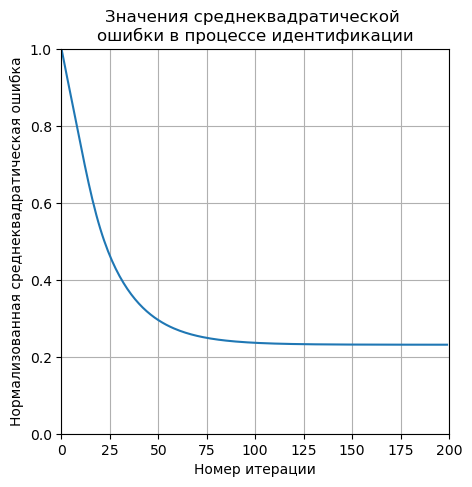

In [21]:
plot_loss_path(fs.fit_results_)
plt.show()

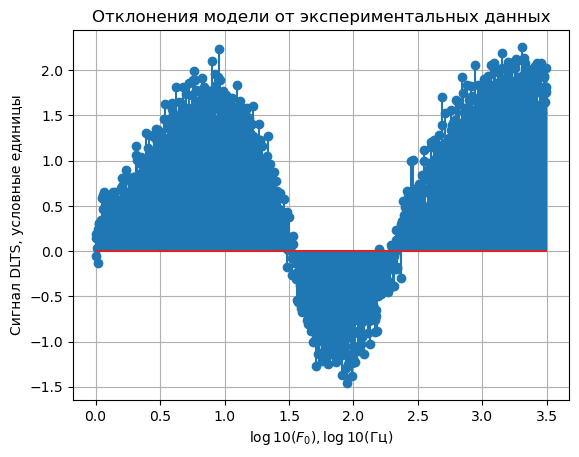

In [22]:
fig, ax = plot_deviations(X_train, y_train, fs.predict(X_train))
plt.show()

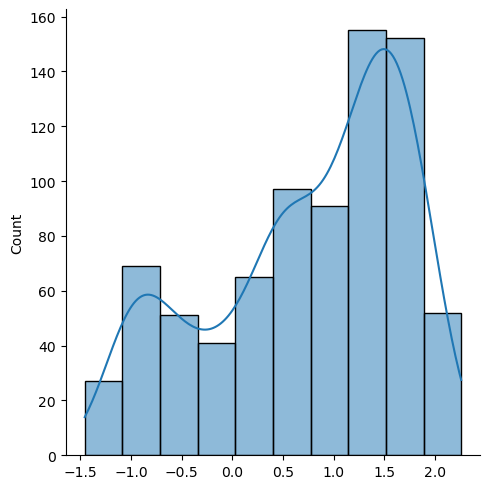

In [23]:
sns.displot(x=y_train - fs.predict(X_train), bins=10, kde=True)
plt.show()

## fit_p_coef=True

In [24]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-5,
                               fit_p_coef=True,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=X_train, y=y_train)

SklSingleExpFrequencyScan(filling_pulse=2e-05, learning_rate=0.05, n_iters=200,
                          stop_val=1e-05)

In [25]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.17545294 0.20274095 0.21645047 0.19260316 0.19036629 0.20231927
 0.20019245 0.20233284 0.21142478 0.19438401]
Mean: 0.1988267159063313
Standard deviation: 0.010896640729890689


In [26]:
fs.fit_results_

,amplitude_0,filling_pulse,fit_p_coef,learning_rate,loss,n_exps,n_iters,p_coef,stop_val,time_constant_pow_0,verbose
0,0.966850,0.00002,True,0.05,5.007153,1,200,1.000000,0.00001,-2.725336,False
1,1.050121,0.00002,True,0.05,4.812933,1,200,0.961103,0.00001,-2.691371,False
2,1.133776,0.00002,True,0.05,4.605719,1,200,0.916977,0.00001,-2.655669,False
3,1.217983,0.00002,True,0.05,4.382701,1,200,0.866934,0.00001,-2.618588,False
4,1.302908,0.00002,True,0.05,4.140171,1,200,0.810102,0.00001,-2.580537,False
...,...,...,...,...,...,...,...,...,...,...,...
131,3.478752,0.00002,True,0.05,0.039094,1,200,0.196644,0.00001,-2.302806,False
132,3.479510,0.00002,True,0.05,0.039082,1,200,0.196759,0.00001,-2.302689,False
133,3.480246,0.00002,True,0.05,0.039071,1,200,0.196871,0.00001,-2.302577,False
134,3.480960,0.00002,True,0.05,0.039060,1,200,0.196979,0.00001,-2.302468,False


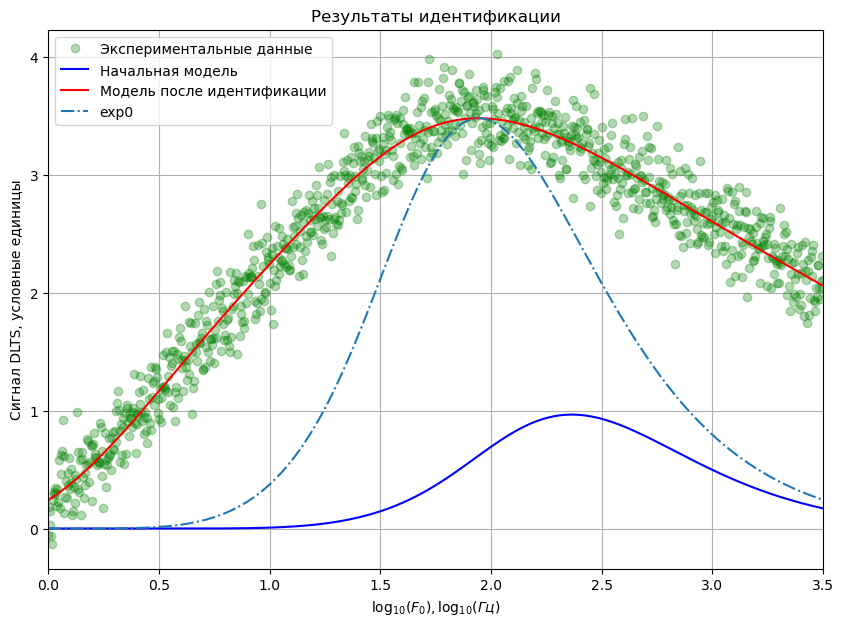

In [27]:
plot_model(X, y, SklSingleExpFrequencyScan, fs.fit_results_)
plt.show()

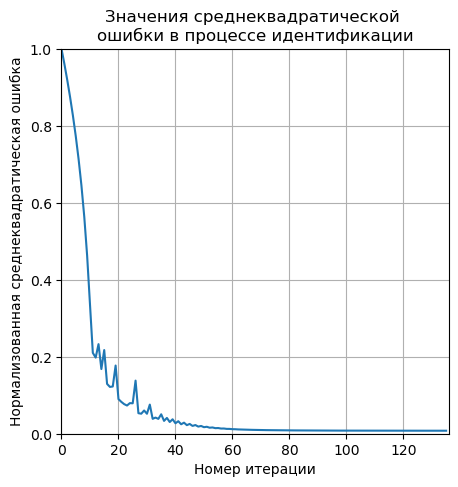

In [28]:
plot_loss_path(fs.fit_results_)
plt.show()

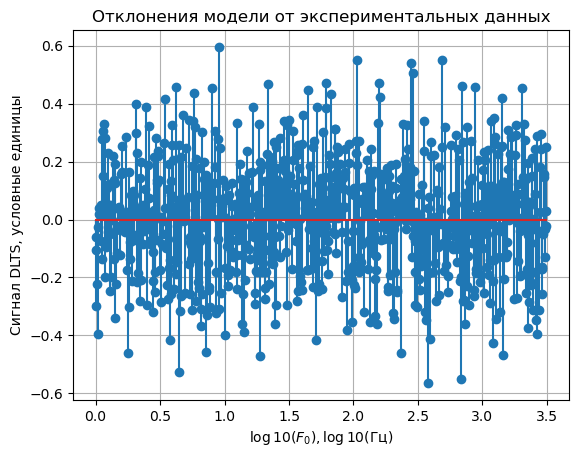

In [29]:
fig, ax = plot_deviations(X_train, y_train, fs.predict(X_train))
plt.show()

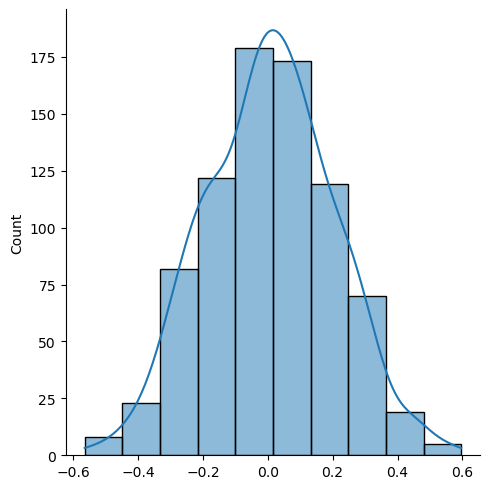

In [30]:
sns.displot(x=y_train - fs.predict(X_train), bins=10, kde=True)
plt.show()

## GridSearchCV

In [31]:
grid_search = GridSearchCV(fs, {'fit_p_coef': [False, True]}, cv=10, scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=SklSingleExpFrequencyScan(filling_pulse=2e-05,
                                                 learning_rate=0.05,
                                                 n_iters=200, stop_val=1e-05),
             n_jobs=-1, param_grid={'fit_p_coef': [False, True]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_

{'fit_p_coef': True}

In [34]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

1.434295605274072 {'fit_p_coef': False}
0.21139316836028765 {'fit_p_coef': True}


In [35]:
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.17545406 0.20274409 0.21645734 0.19259576 3.07213375 0.2024728
 0.20021419 0.20236087 0.21142296 0.1943897 ]
Mean: 0.48702455239295894
Standard deviation: 0.8617674141708349


In [36]:
grid_search.best_estimator_.fit_results_

,amplitude_0,filling_pulse,fit_p_coef,learning_rate,loss,n_exps,n_iters,p_coef,stop_val,time_constant_pow_0,verbose
0,-0.177627,0.00002,True,0.05,7.155653,1,200,1.000000,0.00001,-3.214316,False
1,-0.088348,0.00002,True,0.05,6.996762,1,200,1.006148,0.00001,-3.224511,False
2,-0.001905,0.00002,True,0.05,6.849031,1,200,1.009116,0.00001,-3.229580,False
3,0.082166,0.00002,True,0.05,6.709316,1,200,1.009179,0.00001,-3.229689,False
4,0.164288,0.00002,True,0.05,6.574897,1,200,1.006510,0.00001,-3.225009,False
...,...,...,...,...,...,...,...,...,...,...,...
144,3.478655,0.00002,True,0.05,0.039096,1,200,0.196629,0.00001,-2.302820,False
145,3.479417,0.00002,True,0.05,0.039084,1,200,0.196745,0.00001,-2.302704,False
146,3.480155,0.00002,True,0.05,0.039072,1,200,0.196857,0.00001,-2.302591,False
147,3.480872,0.00002,True,0.05,0.039062,1,200,0.196966,0.00001,-2.302481,False


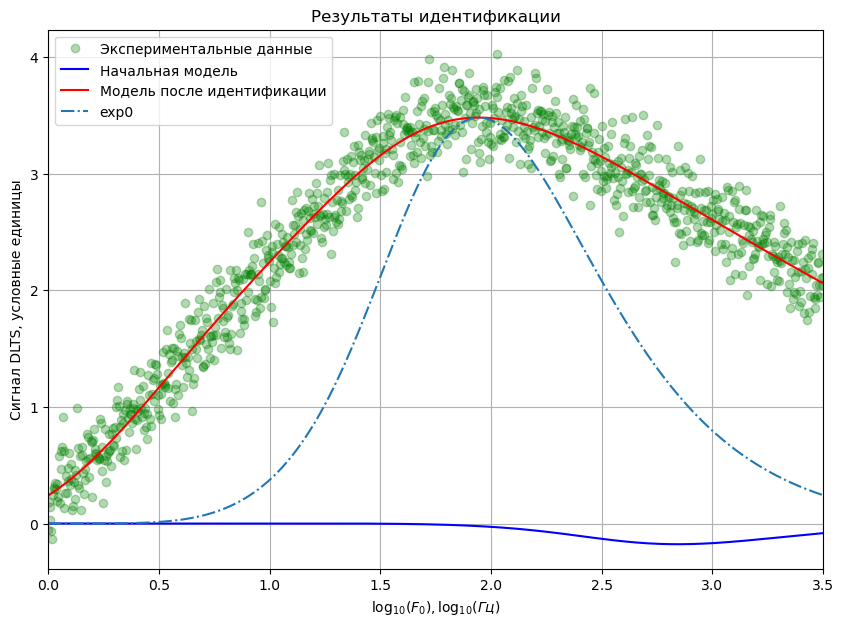

In [37]:
plot_model(X, y, SklSingleExpFrequencyScan, grid_search.best_estimator_.fit_results_)
plt.show()

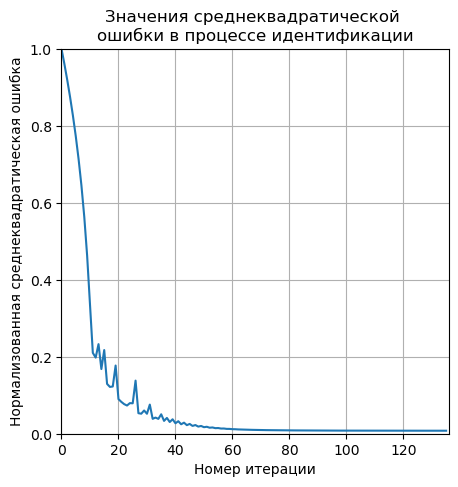

In [38]:
plot_loss_path(fs.fit_results_)
plt.show()

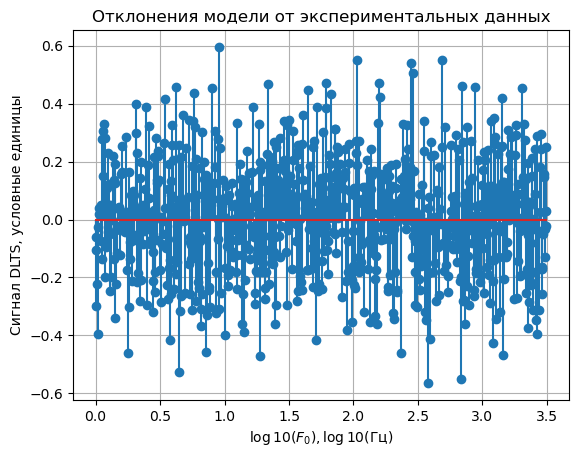

In [39]:
fig, ax = plot_deviations(X_train, y_train, fs.predict(X_train))
plt.show()

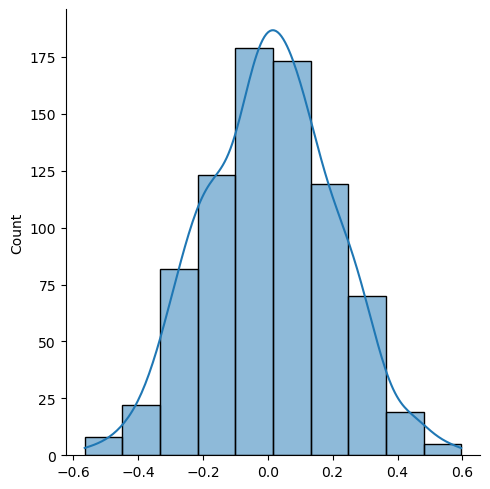

In [40]:
sns.displot(x=y_train - grid_search.best_estimator_.predict(X_train), bins=10, kde=True)
plt.show()

In [41]:
mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test), squared=False)

0.21456465838432795